In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_dataset(index):
    file = open('data/' + str(index) + '.txt', 'r')
    m = int(file.readline())
    train_n = int(file.readline())
    
    train = np.array([[float(x) for x in file.readline().split()] for _ in range(train_n)])
    train_X = train[:, :-1]
    train_y = train[:, -1]
    
    test_n = int(file.readline())
    test = np.array([[float(x) for x in file.readline().split()] for _ in range(test_n)])
    test_X = test[:, :-1]
    test_y = test[:, -1]
    
    train_X = np.hstack(([[1] for _ in train_X], train_X))
    test_X = np.hstack(([[1] for _ in test_X], test_X))
    
    file.close()
    
    return train_X, train_y, test_X, test_y

In [3]:
def nrmse(X, theta, y):
    predicted_y = X @ theta
    n = len(y)
    sum_errors = sum([(a - b) ** 2 for (a, b) in zip(y, predicted_y)])
    return np.sqrt(sum_errors / n) / (np.max(y) - np.min(y))

In [4]:
def process_pseudo_inverted_matrix(train_X, train_y, test_X, test_y):
    # theta = (X.T * X) ^ (-1) * X.T * y
    theta = np.linalg.pinv(train_X) @ train_y
    return nrmse(test_X, theta, test_y), nrmse(train_X, theta, train_y)

In [5]:
def gradient(X, y, theta, i):
    return (np.dot(X[i], theta) - y[i]) * X[i]

In [6]:
def process_gradient_descent(train_X, train_y, test_X, test_y, steps=10000):
    test_nrmses = []
    train_nrmses = []
    
    theta = np.zeros(train_X.shape[1], dtype=float)
    for i in range(steps):
        j = np.random.randint(0, len(train_X))
        g = gradient(train_X, train_y, theta, j)
        
        den = np.dot(g, train_X[j])
        if np.isclose(den, 0):
            alpha = 1e-19
        else:
            alpha = (np.dot(theta, train_X[j]) - train_y[j]) / den
        
        theta = theta * (1 - alpha) - alpha * g
        
        if i % 40 == 20:
            test_nrmses.append(nrmse(test_X, theta, test_y))
            train_nrmses.append(nrmse(train_X, theta, train_y))
    
    return test_nrmses, train_nrmses

In [7]:
def draw_graphics(dataset_index):
    train_X, train_y, test_X, test_y = read_dataset(dataset_index)
    
    matrix_test_nrmse, matrix_train_nrmse = process_pseudo_inverted_matrix(train_X, train_y, test_X, test_y)
    gradient_test_nrmses, gradient_train_nrmses = process_gradient_descent(train_X, train_y, test_X, test_y)
    
    steps = [1 + 40 * i for i in range(len(gradient_test_nrmses))]
    
    matrix_test_nrmses = np.repeat(matrix_test_nrmse, len(steps))
    matrix_train_nrmses = np.repeat(matrix_train_nrmse, len(steps))
    
    plt.plot(steps, gradient_test_nrmses, label='gradient test')
    plt.plot(steps, gradient_train_nrmses, label='gradient train')
    plt.plot(steps, matrix_test_nrmses, label='matrix test')
    plt.plot(steps, matrix_train_nrmses, label='matrix train')
    plt.xlabel('iteration')
    plt.ylabel('NRMSE')
    plt.legend()
    plt.show()

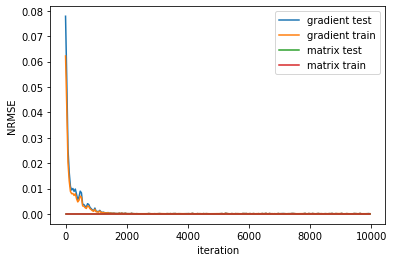

In [8]:
draw_graphics(1)

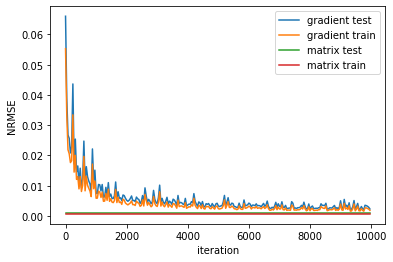

In [9]:
draw_graphics(2)

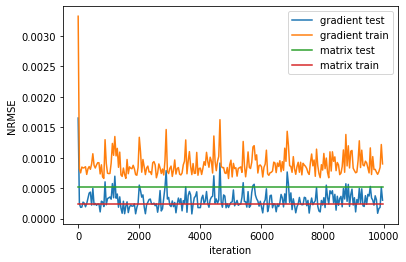

In [10]:
draw_graphics(3)

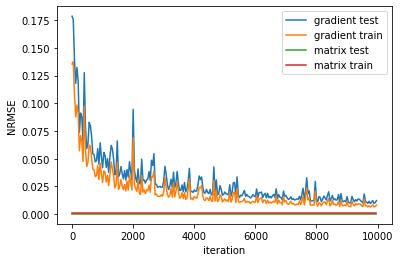

In [11]:
draw_graphics(4)

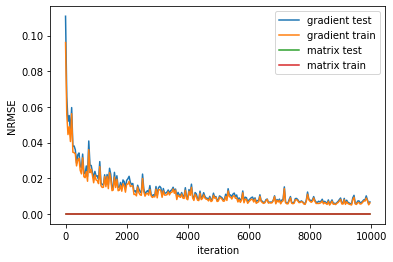

In [12]:
draw_graphics(5)

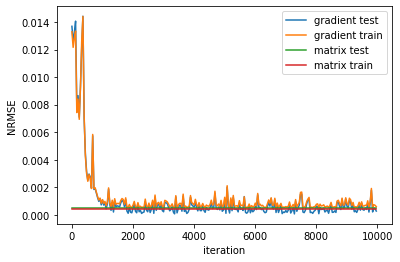

In [13]:
draw_graphics(6)

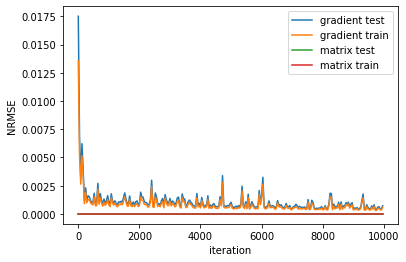

In [14]:
draw_graphics(7)